In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

%matplotlib inline
plt.style.use('seaborn')

In [2]:
data = np.loadtxt('kk1a6')

In [3]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

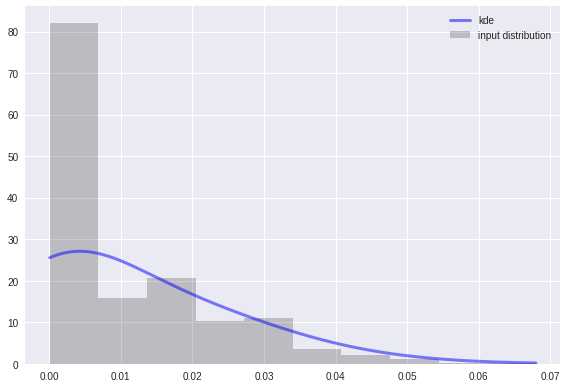

In [13]:
# The grid we'll use for plotting
x_grid = np.linspace(data.min(), data.max(), 10000)
x = data

fig, ax = plt.subplots()
ax.hist(data, fc='black', alpha=0.2, label='input distribution', density=True)

pdf = kde_sklearn(x, x_grid, bandwidth=0.01, kernel='gaussian')
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3, label='kde')
ax.legend()
plt.tight_layout()

In [5]:
np.savetxt('teste.txt', np.c_[x_grid,pdf], delimiter='\t', fmt='%1.6e')